# 1. 라이브러리 Import

In [ ]:
pip install umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import umap
from sklearn.cluster import KMeans
from sklearn.neighbors import KernelDensity


In [ ]:
%matplotlib inline

import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정



W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123594 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

# 2. 데이터 불러오기

In [ ]:
con_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KB/card_transaction2.csv')


# 3. 데이터 전처리

In [ ]:
con_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2285 entries, 0 to 2284
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      2285 non-null   object
 1   고객번호    2285 non-null   int64 
 2   카페      2285 non-null   int64 
 3   음식점     2285 non-null   int64 
 4   여행      2285 non-null   int64 
 5   서점      2285 non-null   int64 
 6   쇼핑      2285 non-null   int64 
 7   온라인결제   2285 non-null   int64 
 8   교통      2285 non-null   int64 
 9   미용실     2285 non-null   int64 
 10  병원      2285 non-null   int64 
 11  주유소     2285 non-null   int64 
 12  화장품     2285 non-null   int64 
 13  편의점     2285 non-null   int64 
 14  주차장     2285 non-null   int64 
 15  문화      2285 non-null   int64 
 16  이동통신    2285 non-null   int64 
 17  학원      2285 non-null   int64 
 18  스포츠     2285 non-null   int64 
 19  부동산     2285 non-null   int64 
 20  자동차     2285 non-null   int64 
 21  기기      2285 non-null   int64 
 22  기타      2285 non-null   

In [ ]:
df_sum = con_df.drop('날짜',axis=1)
df_sum = df_sum.groupby(['고객번호']).sum()

In [ ]:
df_sum.head()

,카페,음식점,여행,서점,쇼핑,온라인결제,교통,미용실,병원,주유소,...,택시,사우나,보험,테마파크,OTT구독,배달,해외결제,대형마트,항공사,숙박
고객번호,,,,,,,,,,,,,,,,,,,,,
1,25800,334400,0,31700,487500,31600,0,73900,435400,76400,...,49800,36000,31100,178000,124900,13500,0,203500,0,0
2,57200,422500,8306220,278600,593500,112400,0,69300,261600,2200,...,32300,84800,0,40200,64300,27200,136632,268100,6723420,1582800
3,23700,441900,0,32900,0,101900,0,51700,225800,150000,...,69100,33100,177100,102400,148900,131300,0,254700,0,0
4,57400,411900,3986840,49300,529900,45100,0,268600,294700,35600,...,123800,0,152500,41400,51000,0,63254,365700,2347760,1639080
5,36500,381700,0,47800,274700,0,112000,60200,205700,42400,...,85800,90200,64300,7000,13400,102900,0,88500,0,0


In [ ]:
df_sum2 = df_sum.drop(['부동산','여행','자동차','항공사','기기','기타'],axis=1)



                  카페            음식점            서점            쇼핑  \
count     100.000000     100.000000     100.00000  1.000000e+02   
mean    39066.000000  402710.000000   99884.00000  4.889190e+05   
std     22810.059893   39903.744033   61989.59626  2.922461e+05   
min         0.000000  309600.000000       0.00000  0.000000e+00   
25%     21575.000000  369325.000000   48025.00000  2.946250e+05   
50%     36550.000000  397700.000000   94250.00000  4.769500e+05   
75%     53450.000000  432375.000000  147750.00000  6.856000e+05   
max    108700.000000  481600.000000  278600.00000  1.225700e+06   

               온라인결제             교통            미용실             병원  \
count     100.000000     100.000000     100.000000     100.000000   
mean    73009.000000   12684.000000   70541.000000  240026.000000   
std     42158.318961   33575.137266   46861.149067  152911.596973   
min         0.000000       0.000000       0.000000       0.000000   
25%     43600.000000       0.000000   36875.000000 

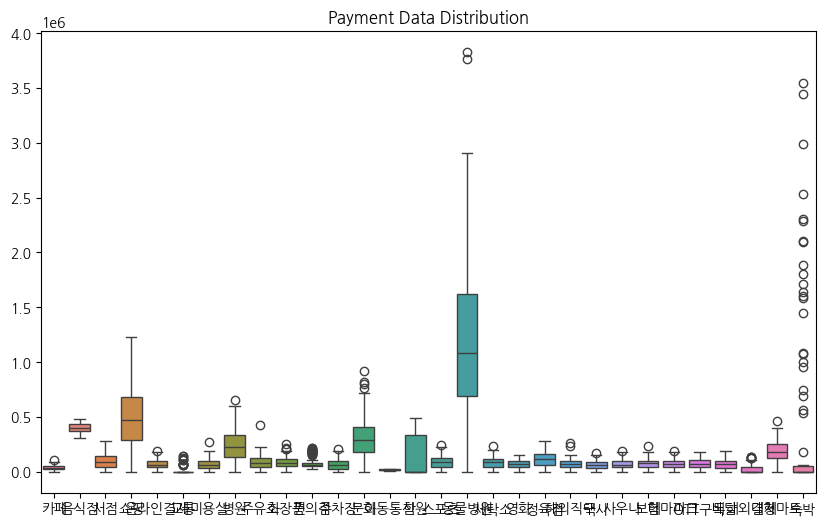

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 예시 데이터프레임 (df_sum이 결제 데이터를 포함한 데이터프레임이라고 가정)
# df_sum = pd.read_csv("payment_data.csv")

# 데이터 분포 확인
print(df_sum2.describe())

# 박스 플롯 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sum2)
plt.title("Payment Data Distribution")
plt.show()


In [ ]:
# df_sum = df_sum.drop(['항공사','숙박','주유소'],axis=1)


# 3.2 데이터 스케일링 - 표준화

In [ ]:
# # 데이터 표준화
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(df_sum2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_sum2)

# 3.3 PCA 차원 축소 후 Kmeans

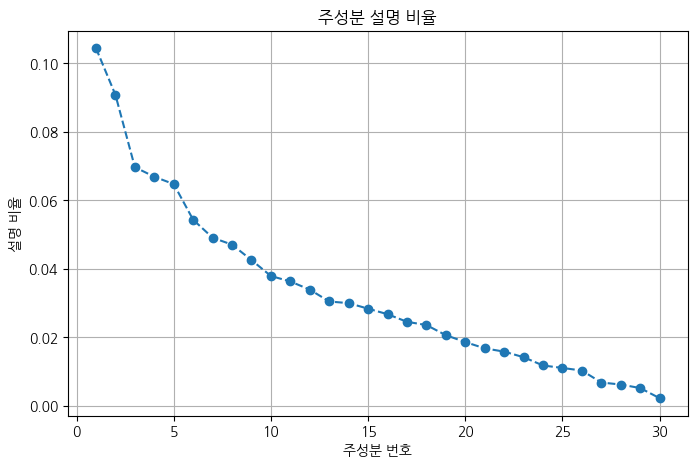

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


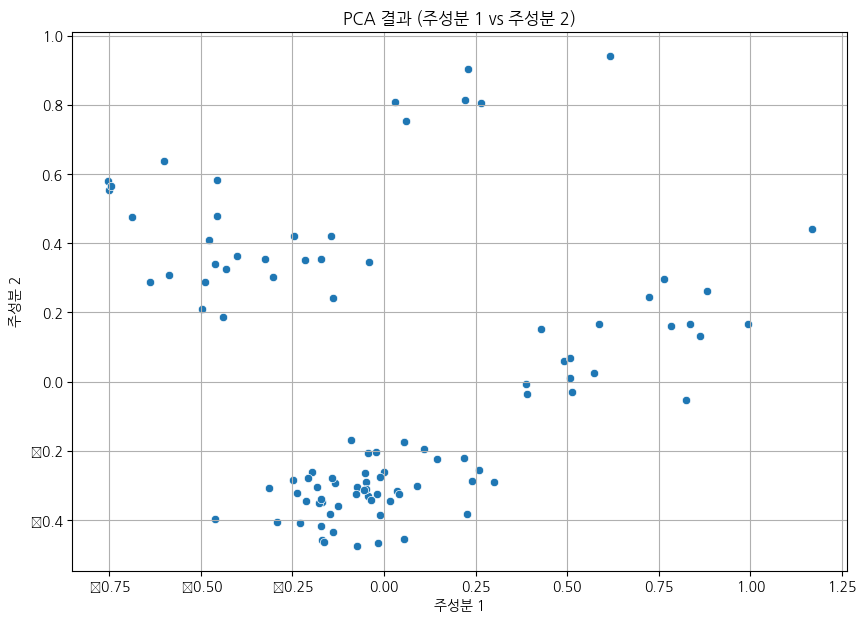

In [ ]:
# PCA 적용
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# 주성분 설명 비율
explained_variance_ratio = pca.explained_variance_ratio_

# 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(data=pca_result, columns=[f'주성분{i+1}' for i in range(pca_result.shape[1])])

# 주성분 설명 비율 시각화
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('주성분 설명 비율')
plt.xlabel('주성분 번호')
plt.ylabel('설명 비율')
plt.grid(True)
plt.show()

# 주성분 시각화 (2D)
if pca_result.shape[1] >= 2:
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=pca_df['주성분1'], y=pca_df['주성분2'])
    plt.title('PCA 결과 (주성분 1 vs 주성분 2)')
    plt.xlabel('주성분 1')
    plt.ylabel('주성분 2')
    plt.grid(True)
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


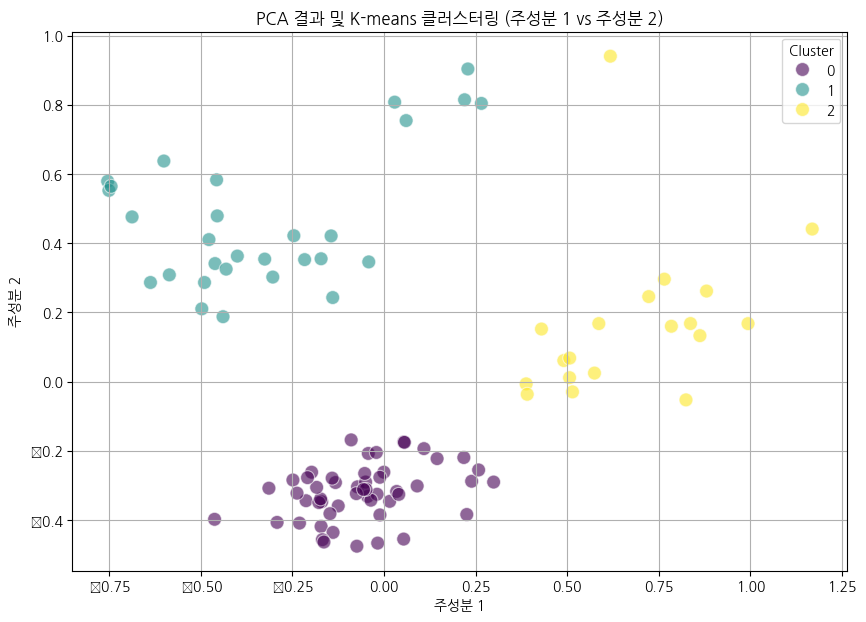

In [ ]:

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_result[:, :2])

# 클러스터링 결과를 데이터프레임에 추가
pca_df['Cluster'] = clusters

# 클러스터링 결과 시각화 (2D)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_df['주성분1'], y=pca_df['주성분2'], hue=pca_df['Cluster'], palette='viridis', s=100, alpha=0.6)
plt.title('PCA 결과 및 K-means 클러스터링 (주성분 1 vs 주성분 2)')
plt.xlabel('주성분 1')
plt.ylabel('주성분 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

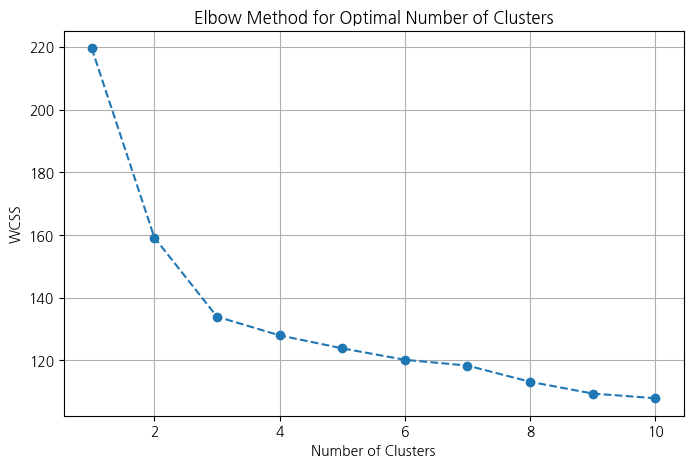

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

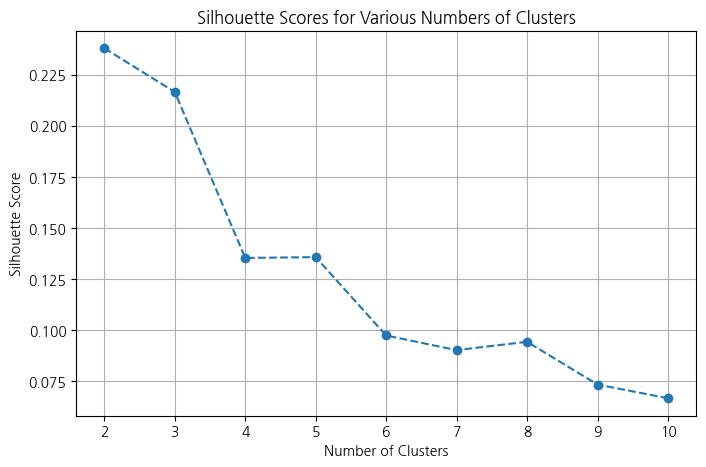

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Elbow method (엘보우 방법)
wcss = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Silhouette Score (실루엣 점수)
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_df)
    silhouette_avg = silhouette_score(pca_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# 데이터 표준화
# scaler = StandardScaler()
# scaled_df = scaler.fit_transform(df2)

# 클러스터 갯수를 리스트로 받아 실루엣 시각화 함수
def visualize_silhouette_kmeans(cluster_lists, X_features):
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    for ind, n_cluster in enumerate(cluster_lists):
        # KMeans 모델 생성 및 학습
        kmeans = KMeans(n_clusters=n_cluster, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X_features)

        # 실루엣 점수 계산
        sil_avg = silhouette_score(X_features, cluster_labels, metric='euclidean')
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title(f'Number of Cluster: {n_cluster}\nSilhouette Score: {round(sil_avg, 3)}')
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # y축 레이블 제거
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels == i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values,
                                   facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

    plt.tight_layout()
    plt.show()

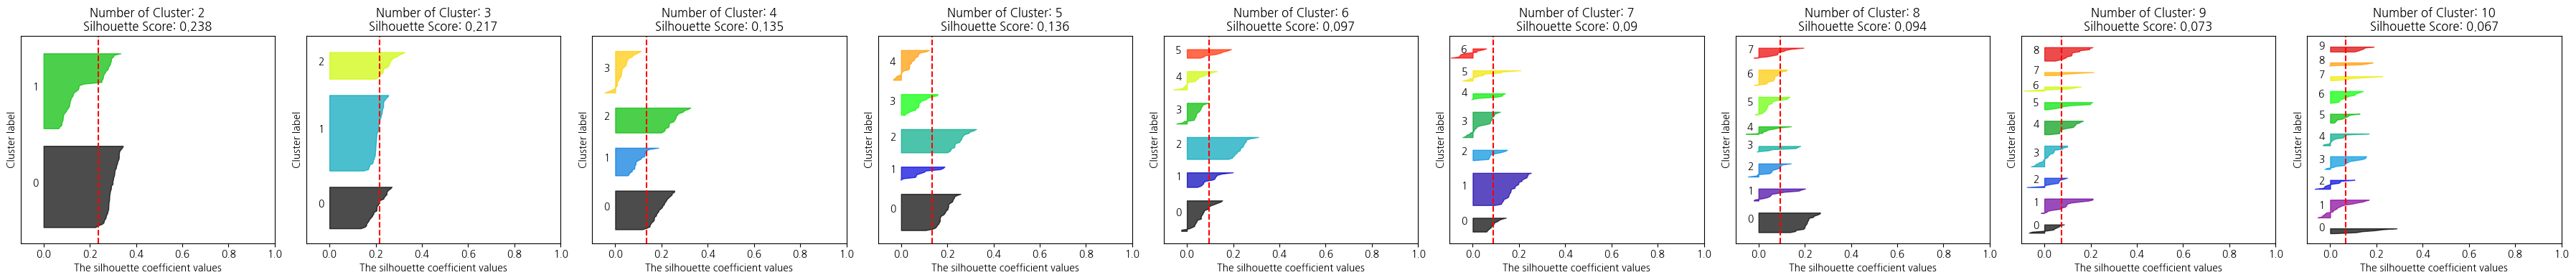

In [ ]:
visualize_silhouette_kmeans(range(2,11), pca_df)


# 3.4 UMAP 차원축소 후 Kmeans

In [ ]:
# # 데이터 표준화
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(df_sum2)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaled_data = scaler.fit_transform(df_sum2)


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
<ipython-input-73-2bb3748ff855>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap[:, 0], X_umap[:, 1], s=50, cmap='viridis')


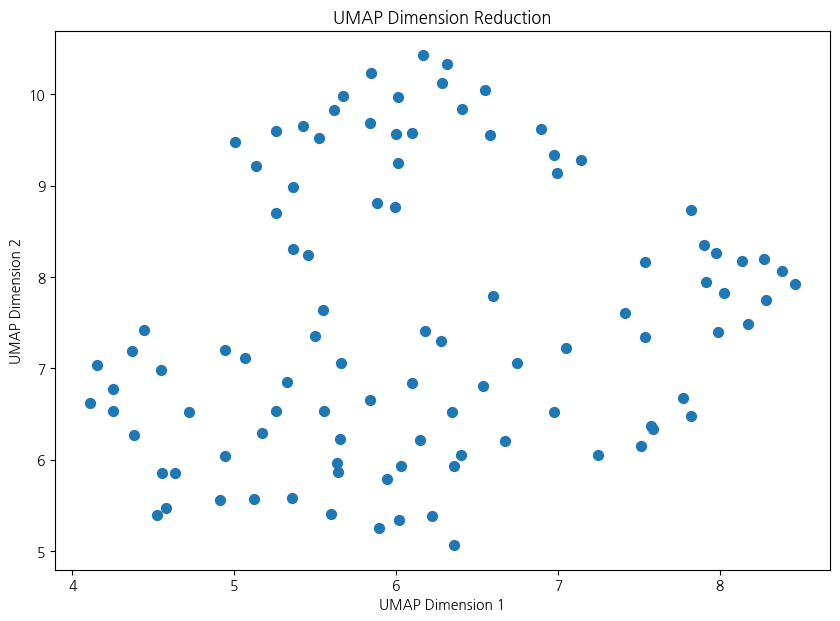

In [ ]:
# UMAP 모델 생성
import umap
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)

# 데이터에 UMAP 적용/
X_umap = umap_model.fit_transform(scaled_data)

# 데이터 시각화
plt.figure(figsize=(10, 7))
plt.scatter(X_umap[:, 0], X_umap[:, 1], s=50, cmap='viridis')
plt.title('UMAP Dimension Reduction')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


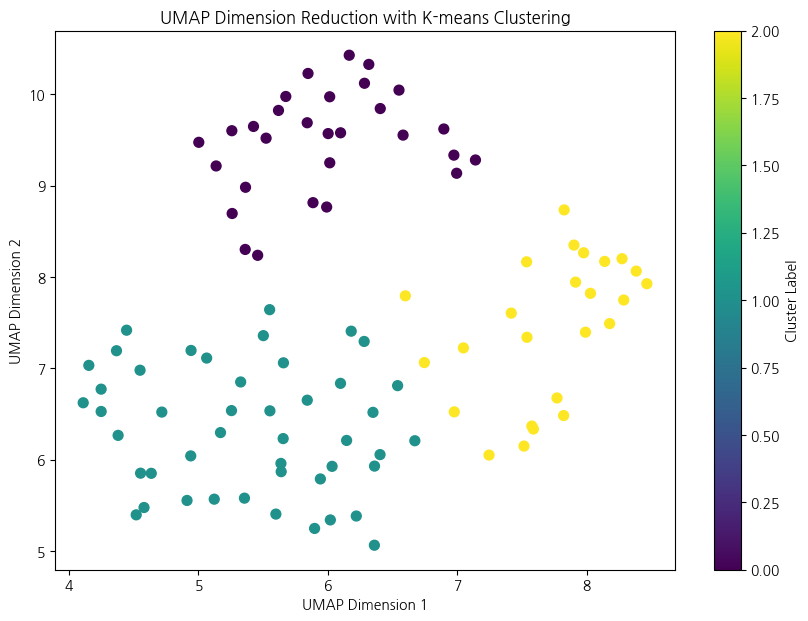

In [ ]:
from sklearn.cluster import KMeans

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=3)  # 클러스터 수를 적절히 설정하세요
clusters = kmeans.fit_predict(X_umap)

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=clusters, cmap='viridis', s=50)
plt.colorbar(scatter, label='Cluster Label')
plt.title('UMAP Dimension Reduction with K-means Clustering')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

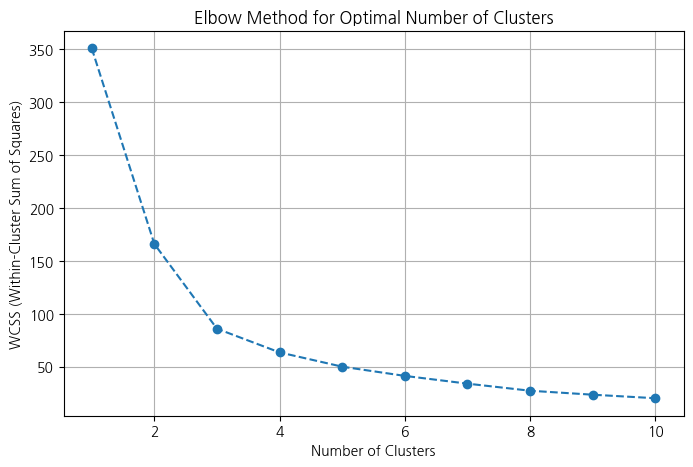

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

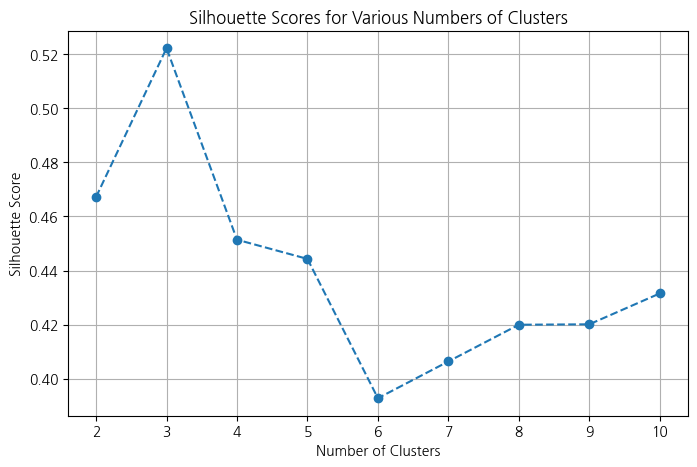

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# 엘보우 방법 적용
wcss = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans.fit(X_umap)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

# 실루엣 점수 계산
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X_umap)
    silhouette_avg = silhouette_score(X_umap, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to 

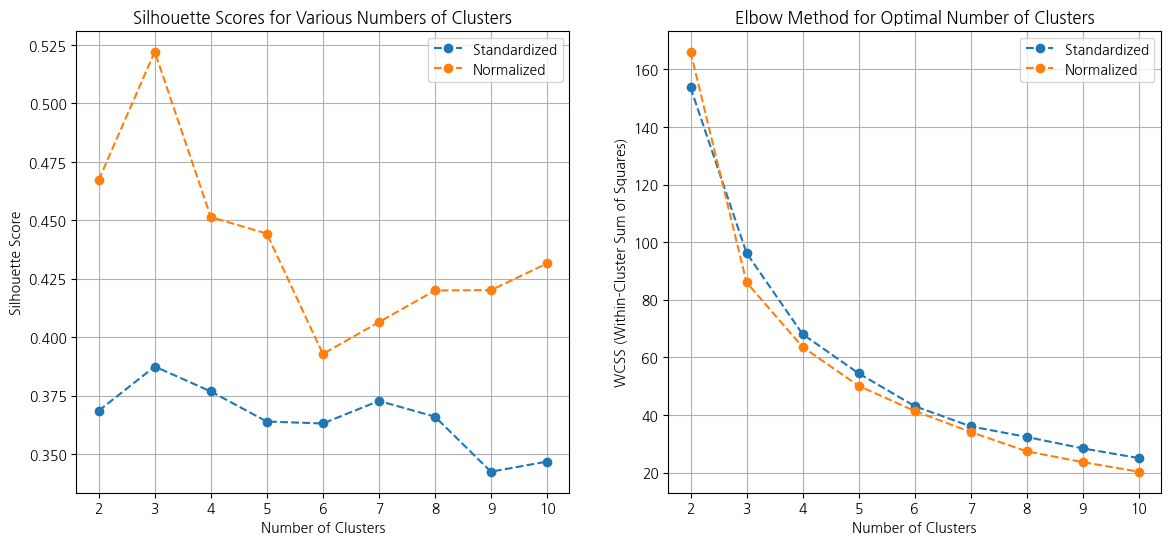

In [ ]:
import umap
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 예시 데이터프레임 (df_sum이 결제 데이터를 포함한 데이터프레임이라고 가정)
# df_sum = pd.read_csv("payment_data.csv")

# 표준화
scaler_standard = StandardScaler()
standard_df = scaler_standard.fit_transform(df_sum2)

# 정규화
scaler_minmax = MinMaxScaler()
normalized_df = scaler_minmax.fit_transform(df_sum2)

# UMAP 적용 (표준화 데이터)
reducer_standard = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_standard_df = reducer_standard.fit_transform(standard_df)

# UMAP 적용 (정규화 데이터)
reducer_minmax = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_minmax_df = reducer_minmax.fit_transform(normalized_df)

# KMeans 클러스터링 및 평가 (표준화 데이터)
wcss_standard = []
silhouette_scores_standard = []
for n_clusters in range(2, 11):
    kmeans_standard = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans_standard.fit(umap_standard_df)
    wcss_standard.append(kmeans_standard.inertia_)
    cluster_labels_standard = kmeans_standard.predict(umap_standard_df)
    silhouette_avg_standard = silhouette_score(umap_standard_df, cluster_labels_standard)
    silhouette_scores_standard.append(silhouette_avg_standard)

# KMeans 클러스터링 및 평가 (정규화 데이터)
wcss_minmax = []
silhouette_scores_minmax = []
for n_clusters in range(2, 11):
    kmeans_minmax = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans_minmax.fit(umap_minmax_df)
    wcss_minmax.append(kmeans_minmax.inertia_)
    cluster_labels_minmax = kmeans_minmax.predict(umap_minmax_df)
    silhouette_avg_minmax = silhouette_score(umap_minmax_df, cluster_labels_minmax)
    silhouette_scores_minmax.append(silhouette_avg_minmax)

# 결과 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), silhouette_scores_standard, marker='o', linestyle='--', label='Standardized')
plt.plot(range(2, 11), silhouette_scores_minmax, marker='o', linestyle='--', label='Normalized')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), wcss_standard, marker='o', linestyle='--', label='Standardized')
plt.plot(range(2, 11), wcss_minmax, marker='o', linestyle='--', label='Normalized')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.legend()
plt.grid(True)

plt.show()


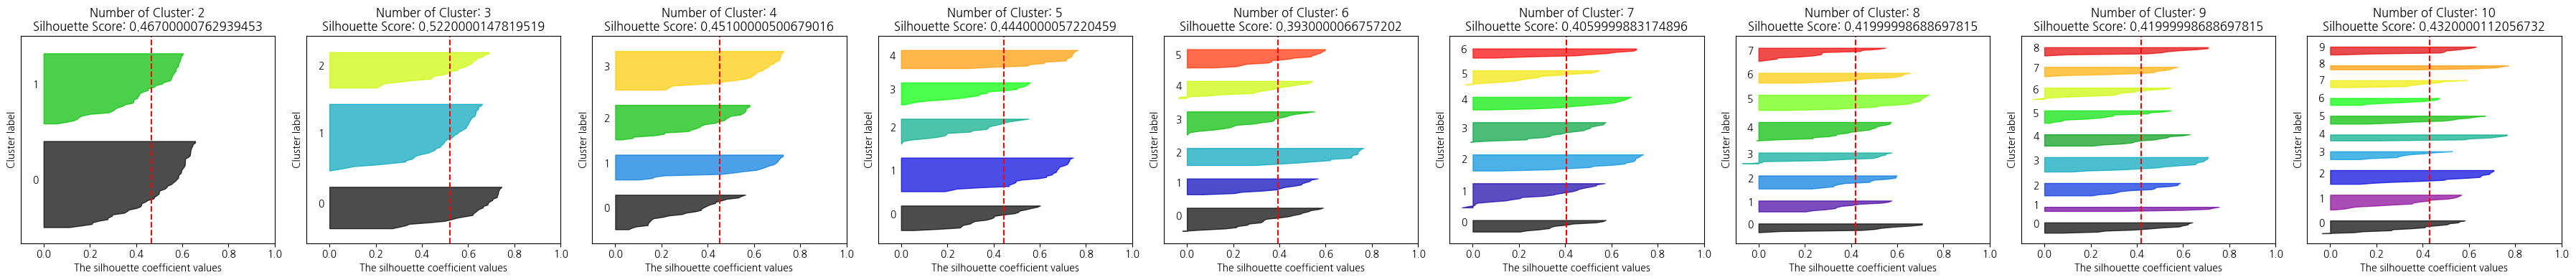

In [ ]:
visualize_silhouette_kmeans(range(2,11), X_umap)

# 3. PaCMAP 차원 축소 후 Kmeans

In [ ]:
pip install pacmap

In [ ]:
import pacmap

In [ ]:
# 데이터 스케일링
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df_sum2)

# PaCMAP 객체 생성
embedding = pacmap.PaCMAP(
    n_components=2,         # 2차원으로 축소
    n_neighbors=None,       # 기본값은 None으로, 데이터에 따라 설정
    MN_ratio=0.5,          # MN 비율
    FP_ratio=2.0           # FP 비율
)

# 데이터 변환
pac_df = embedding.fit_transform(scaled_df, init="pca")

<ipython-input-64-f810d168adef>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(pac_df[:, 0], pac_df[:, 1], cmap="Spectral", s=0.6)


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


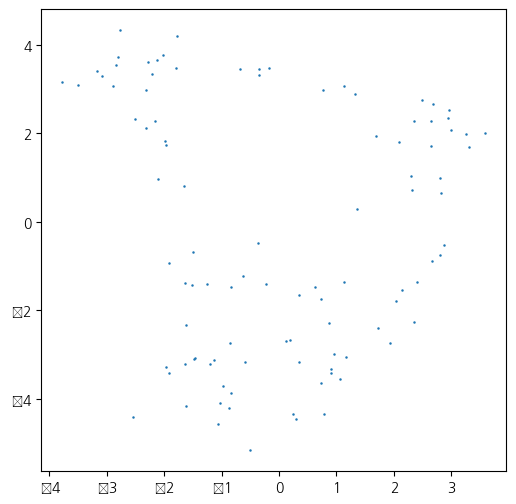

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(pac_df[:, 0], pac_df[:, 1], cmap="Spectral", s=0.6)

In [ ]:
df_sum2.shape

(100, 30)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

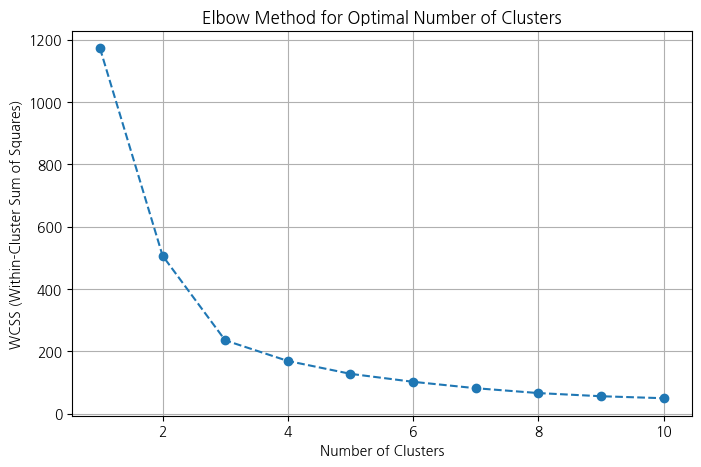

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

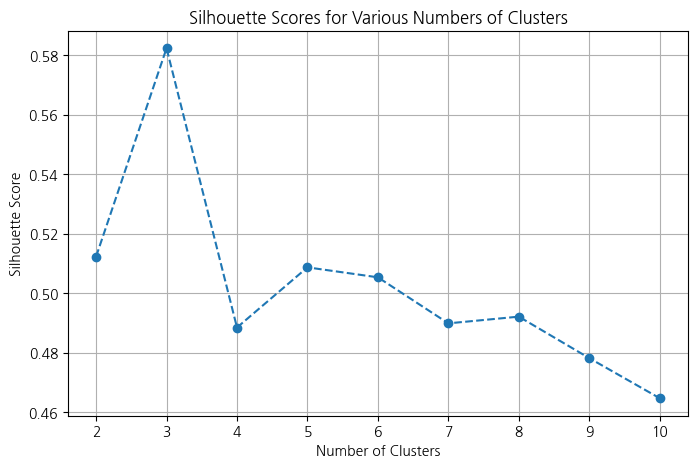

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# 엘보우 방법 적용
wcss = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(pac_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

# 실루엣 점수 계산
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(pac_df)
    silhouette_avg = silhouette_score(pac_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


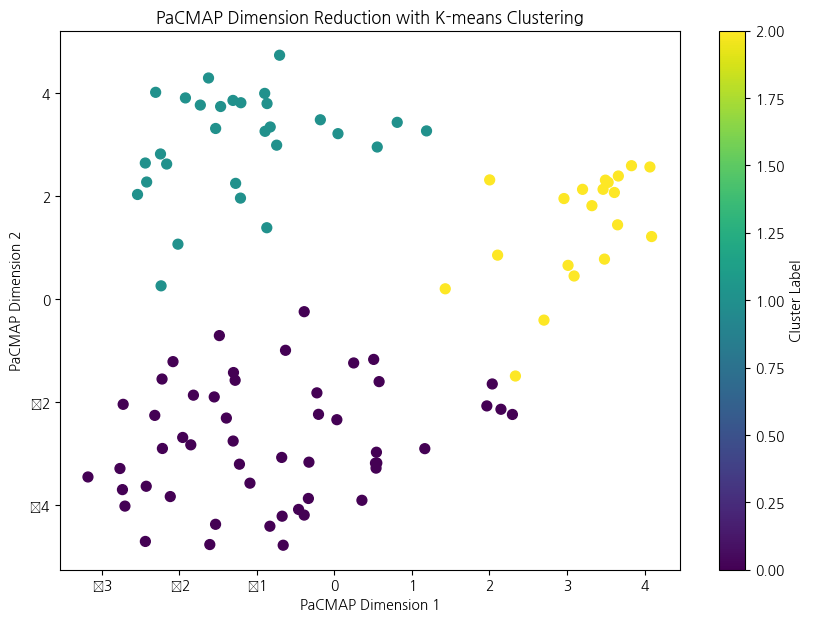

In [ ]:
from sklearn.cluster import KMeans

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=3)  # 클러스터 수를 적절히 설정하세요
clusters = kmeans.fit_predict(pac_df)

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pac_df[:, 0], pac_df[:, 1], c=clusters, cmap='viridis', s=50)
plt.colorbar(scatter, label='Cluster Label')
plt.title('PaCMAP Dimension Reduction with K-means Clustering')
plt.xlabel('PaCMAP Dimension 1')
plt.ylabel('PaCMAP Dimension 2')
plt.show()


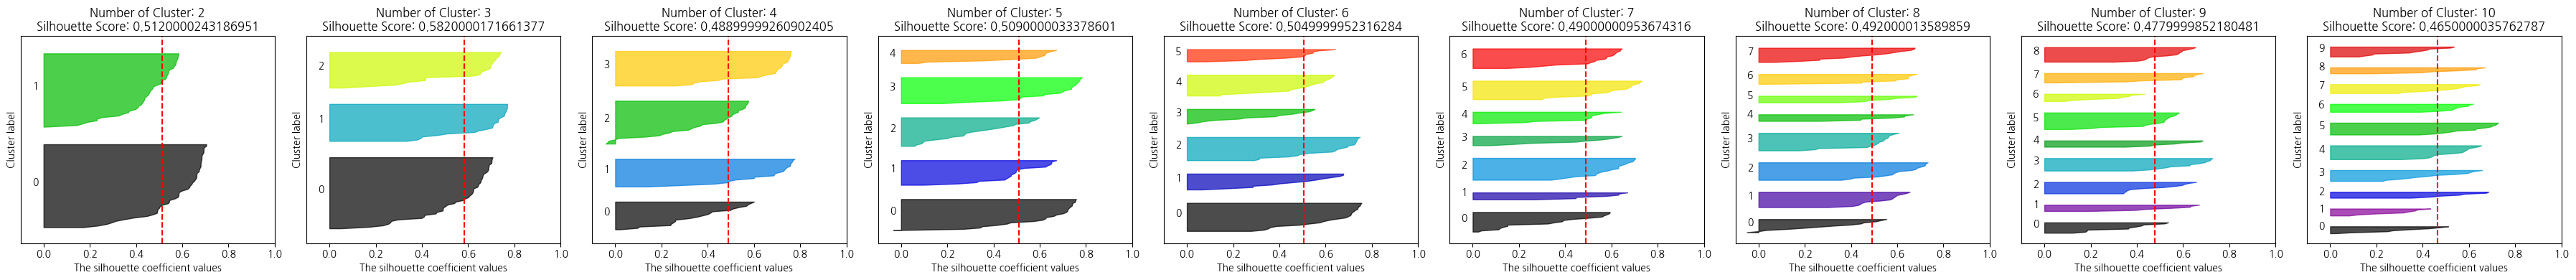

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# 데이터 표준화
# scaler = StandardScaler()
# scaled_df = scaler.fit_transform(df2)

# 클러스터 갯수를 리스트로 받아 실루엣 시각화 함수
def visualize_silhouette_kmeans(cluster_lists, X_features):
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    for ind, n_cluster in enumerate(cluster_lists):
        # KMeans 모델 생성 및 학습
        kmeans = KMeans(n_clusters=n_cluster, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X_features)

        # 실루엣 점수 계산
        sil_avg = silhouette_score(X_features, cluster_labels, metric='euclidean')
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title(f'Number of Cluster: {n_cluster}\nSilhouette Score: {round(sil_avg, 3)}')
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # y축 레이블 제거
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels == i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values,
                                   facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

    plt.tight_layout()
    plt.show()

# 실루엣 시각화 함수 호출
visualize_silhouette_kmeans(range(2,11), pac_df)


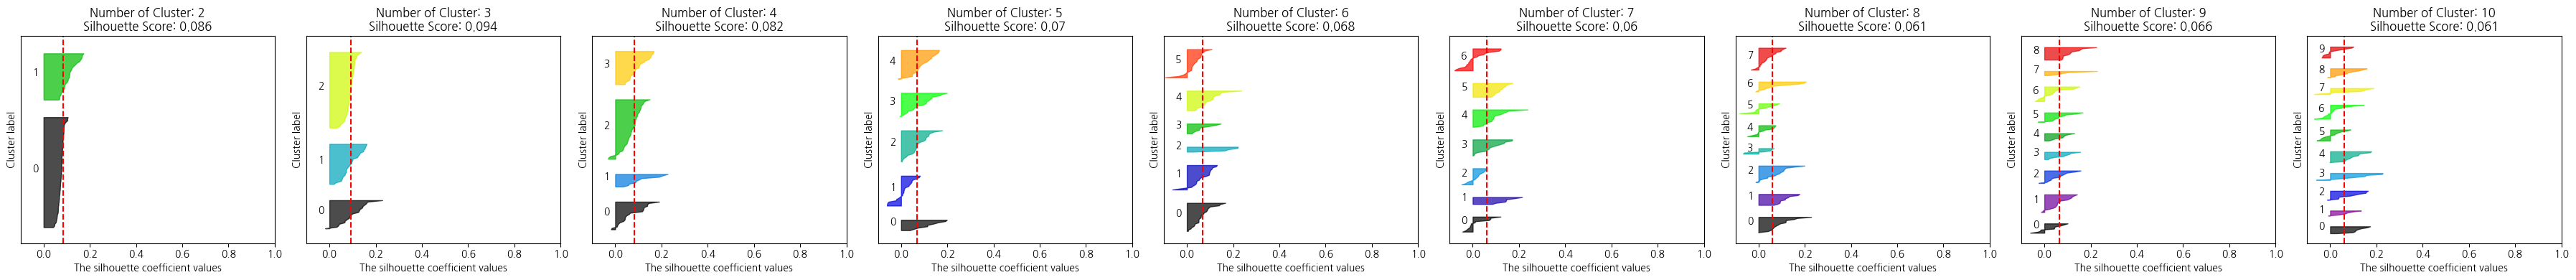

In [ ]:

# 실루엣 시각화 함수 호출
visualize_silhouette_kmeans(range(2,11), scaled_df)


**차원축소를 하지 않으면 실루엣 점수가 매우 낮다**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

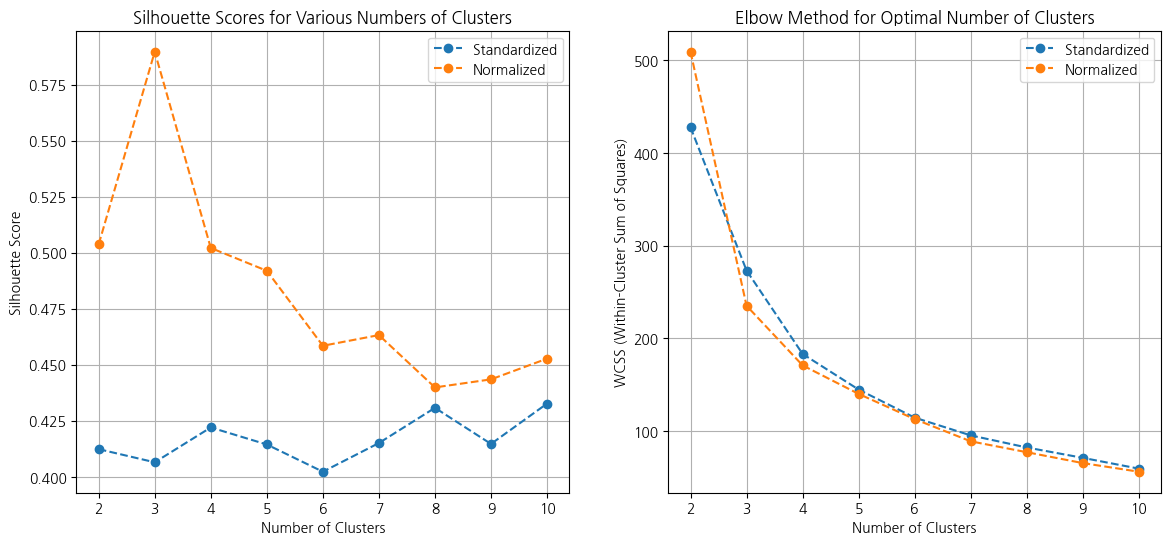

In [ ]:
import umap
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

embedding = pacmap.PaCMAP(n_components=2, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0)

# fit the data (The index of transformed data corresponds to the index of the original data)
pac_df = embedding.fit_transform(scaled_data, init="pca")

# 표준화
scaler_standard = StandardScaler()
standard_df = scaler_standard.fit_transform(df_sum2)

# 정규화
scaler_minmax = MinMaxScaler()
normalized_df = scaler_minmax.fit_transform(df_sum2)

# UMAP 적용 (표준화 데이터)
reducer_standard = pacmap.PaCMAP(n_components=2, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0)
pac_standard_df = reducer_standard.fit_transform(standard_df)

# UMAP 적용 (정규화 데이터)
reducer_minmax = pacmap.PaCMAP(n_components=2, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0)
pac_minmax_df = reducer_minmax.fit_transform(normalized_df)

# KMeans 클러스터링 및 평가 (표준화 데이터)
wcss_standard = []
silhouette_scores_standard = []
for n_clusters in range(2, 11):
    kmeans_standard = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans_standard.fit(pac_standard_df)
    wcss_standard.append(kmeans_standard.inertia_)
    cluster_labels_standard = kmeans_standard.predict(pac_standard_df)
    silhouette_avg_standard = silhouette_score(pac_standard_df, cluster_labels_standard)
    silhouette_scores_standard.append(silhouette_avg_standard)

# KMeans 클러스터링 및 평가 (정규화 데이터)
wcss_minmax = []
silhouette_scores_minmax = []
for n_clusters in range(2, 11):
    kmeans_minmax = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans_minmax.fit(pac_minmax_df)
    wcss_minmax.append(kmeans_minmax.inertia_)
    cluster_labels_minmax = kmeans_minmax.predict(pac_minmax_df)
    silhouette_avg_minmax = silhouette_score(pac_minmax_df, cluster_labels_minmax)
    silhouette_scores_minmax.append(silhouette_avg_minmax)

# 결과 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), silhouette_scores_standard, marker='o', linestyle='--', label='Standardized')
plt.plot(range(2, 11), silhouette_scores_minmax, marker='o', linestyle='--', label='Normalized')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), wcss_standard, marker='o', linestyle='--', label='Standardized')
plt.plot(range(2, 11), wcss_minmax, marker='o', linestyle='--', label='Normalized')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.legend()
plt.grid(True)

plt.show()


데이터 정규성 검정

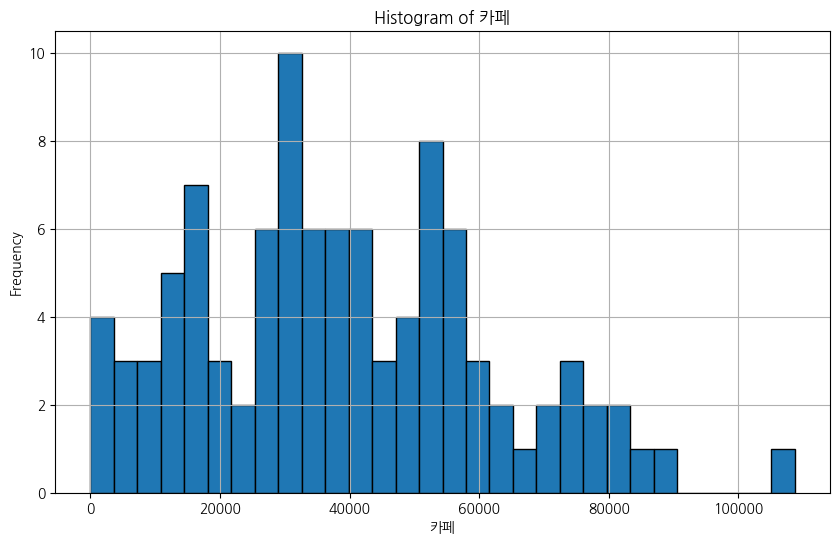

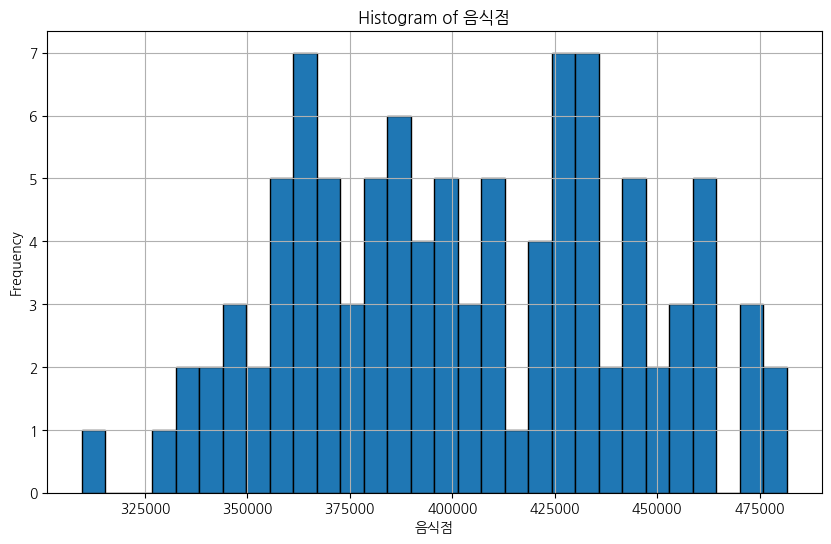

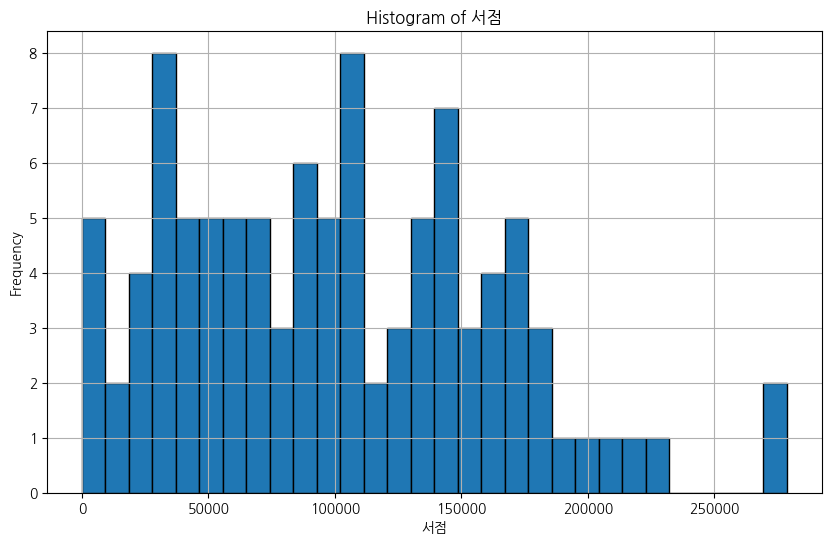

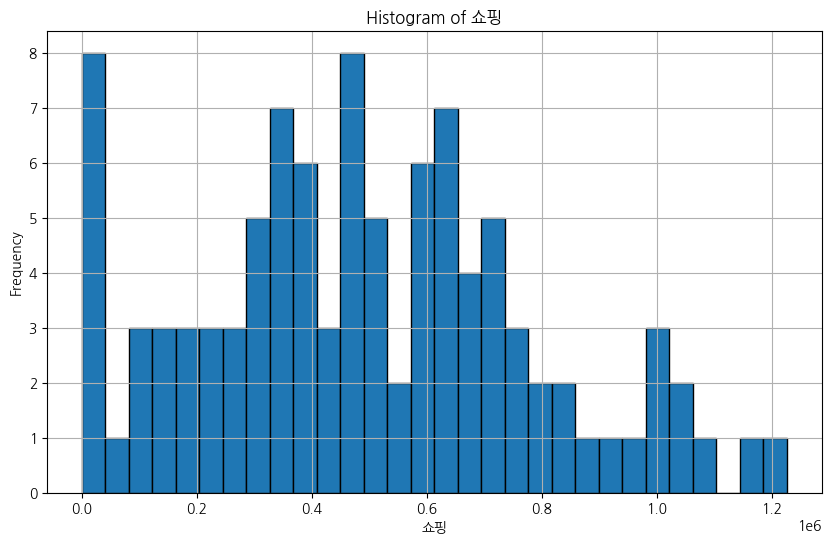

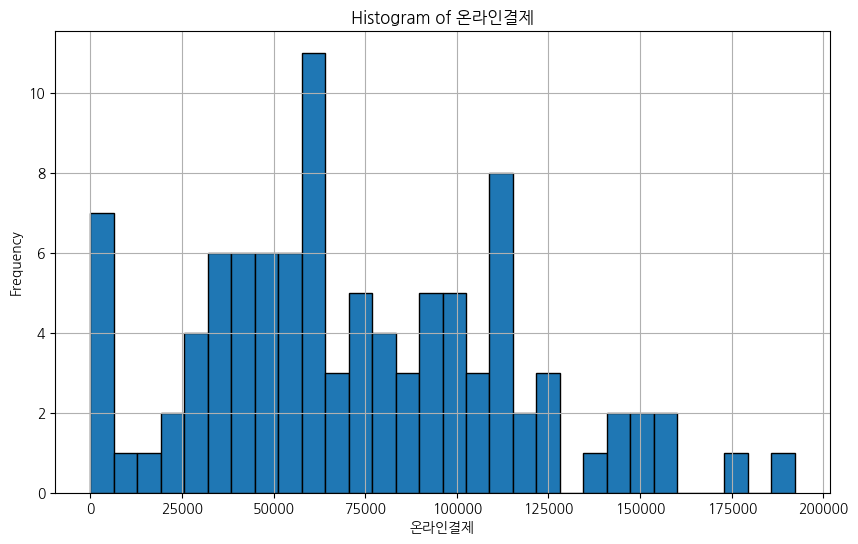

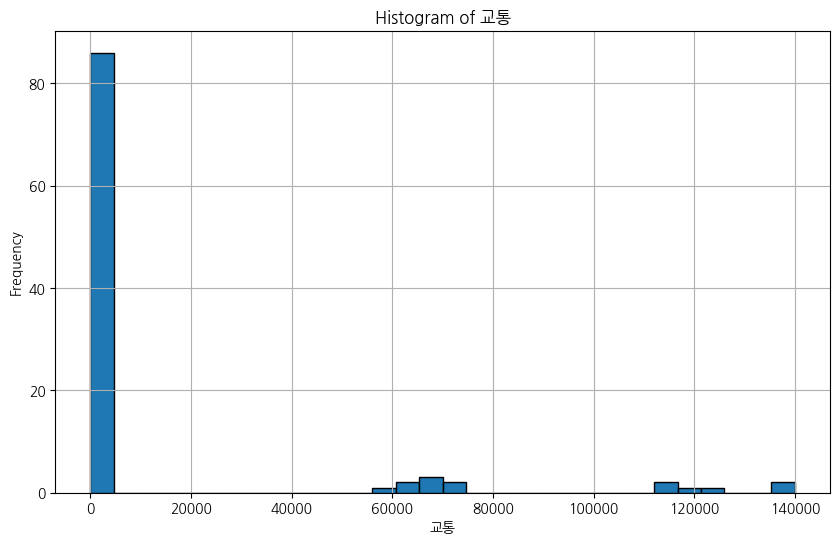

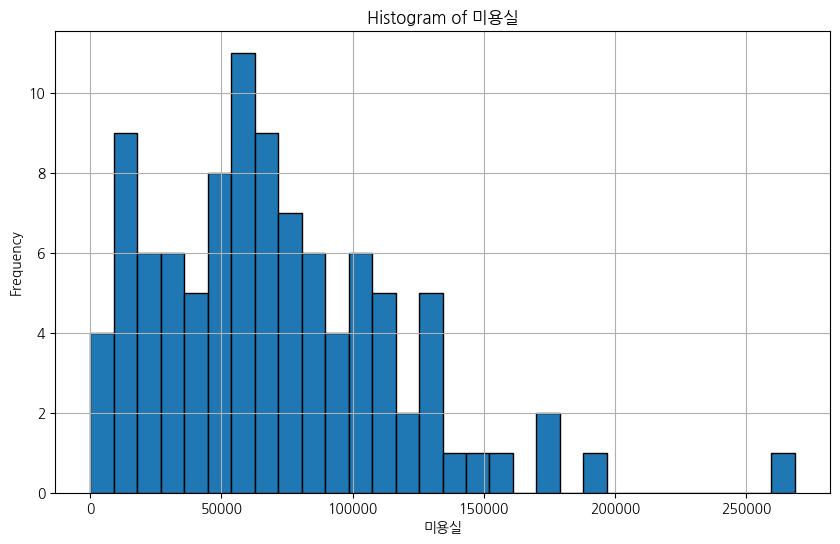

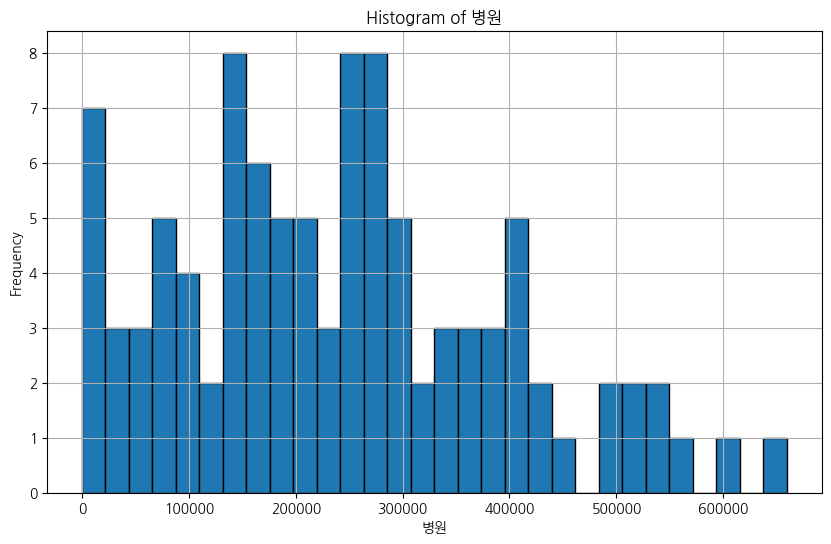

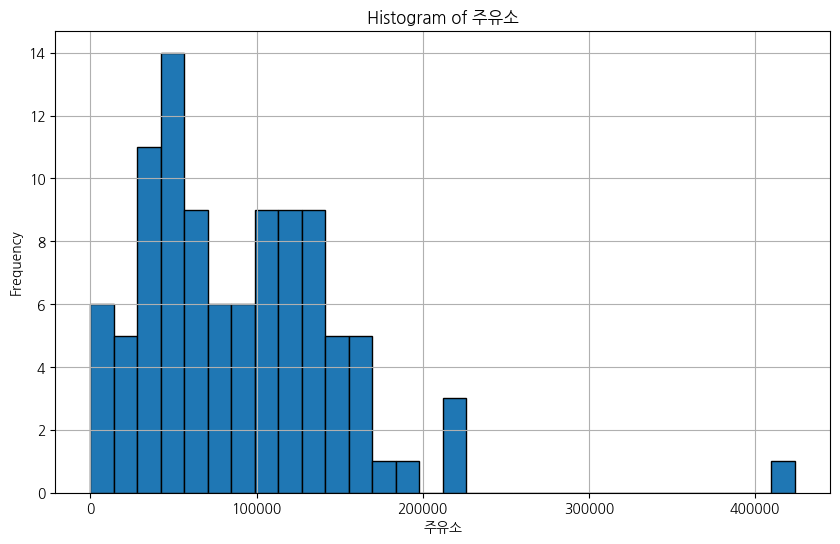

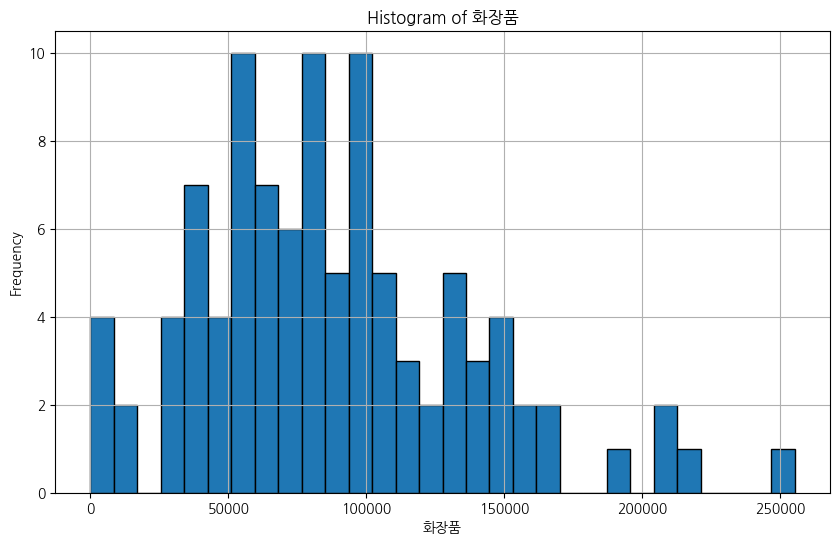

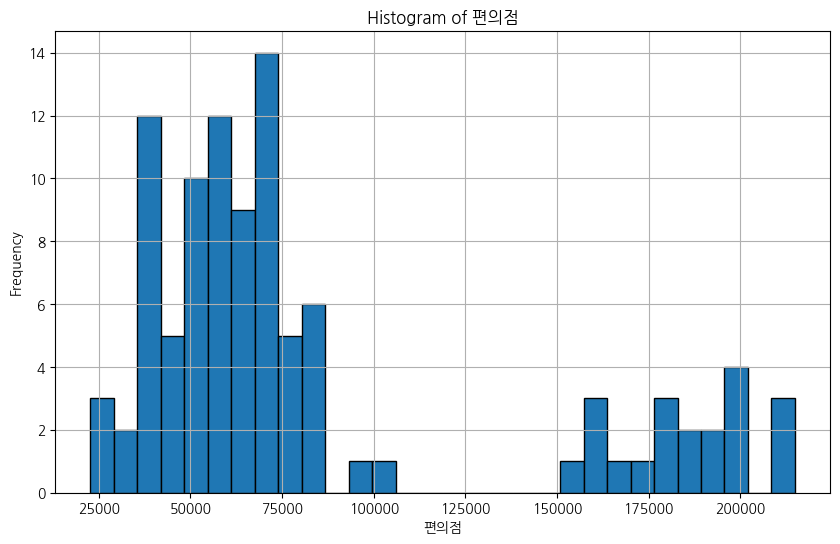

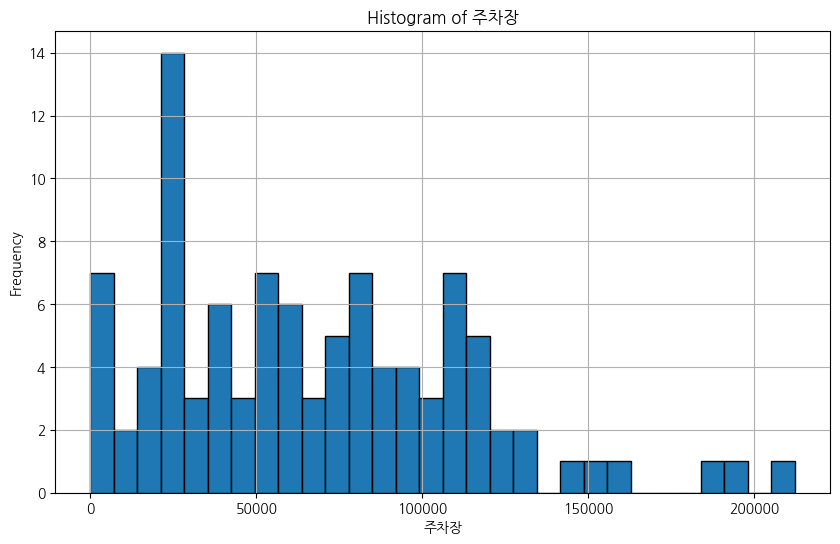

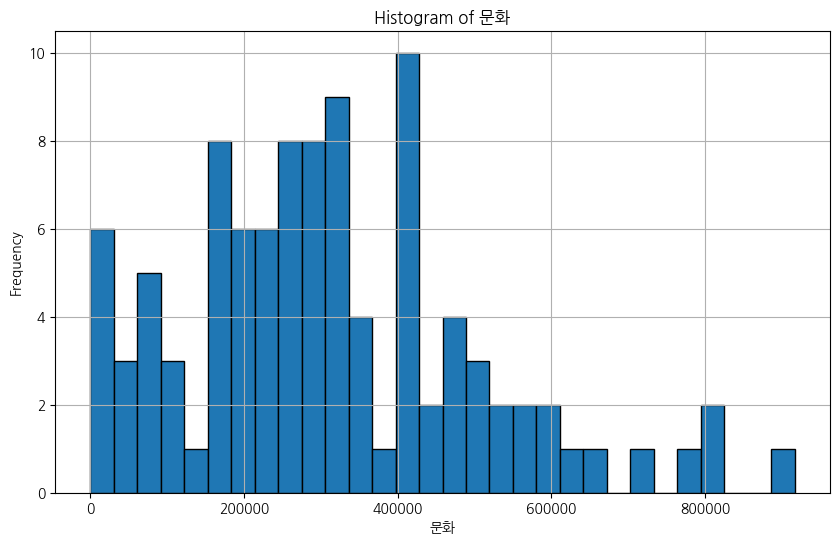

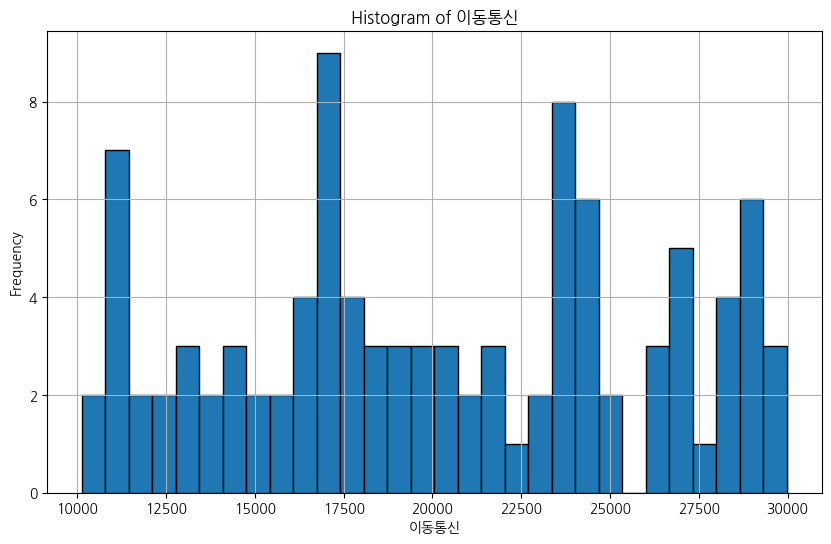

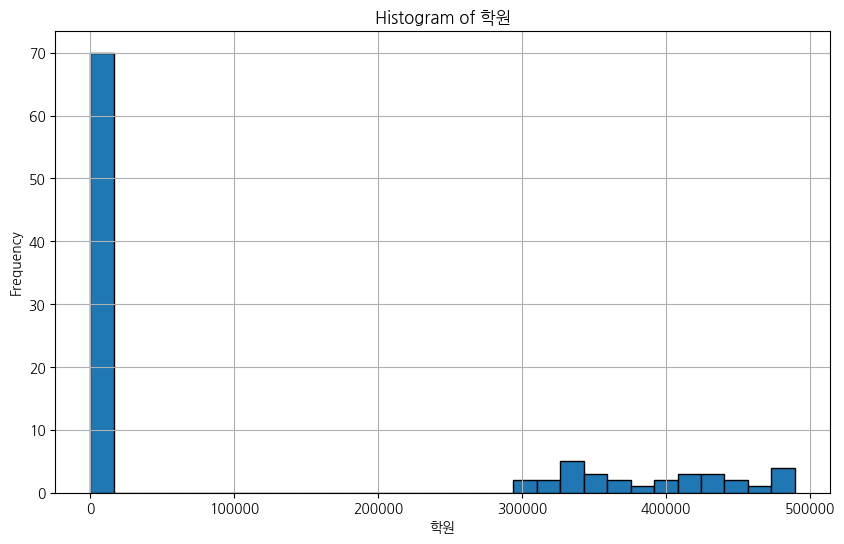

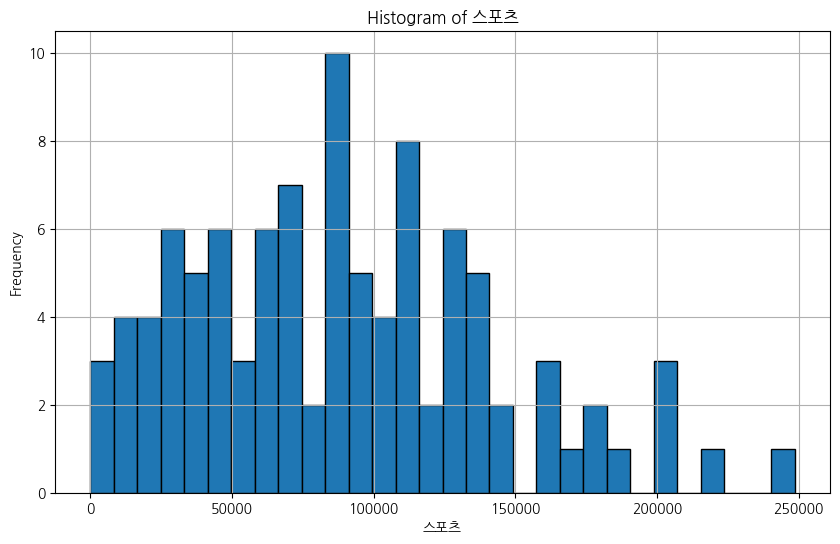

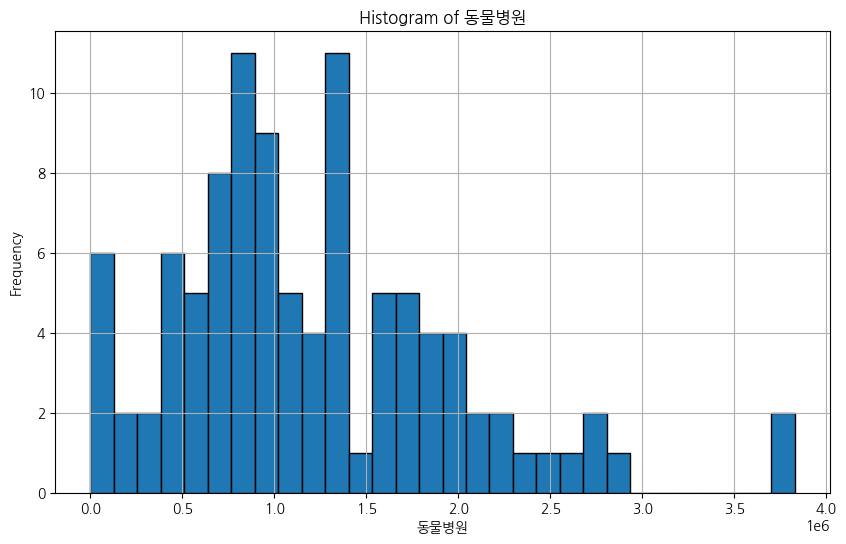

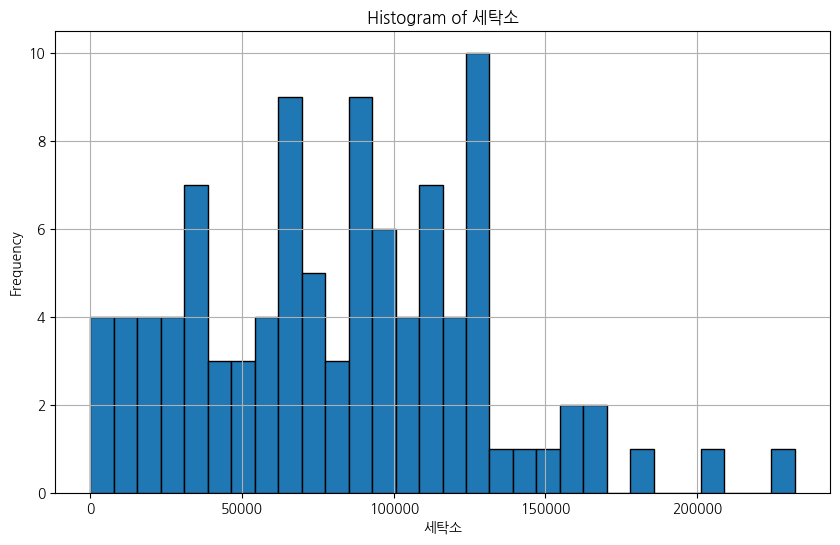

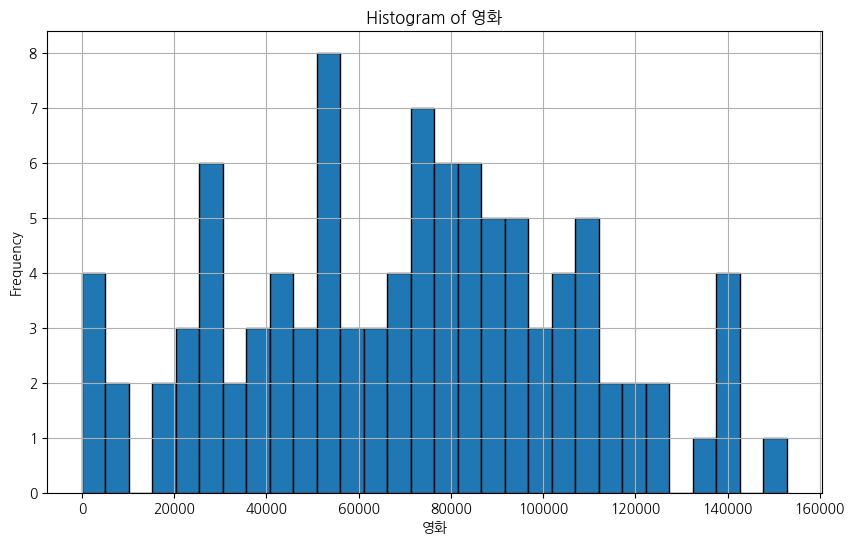

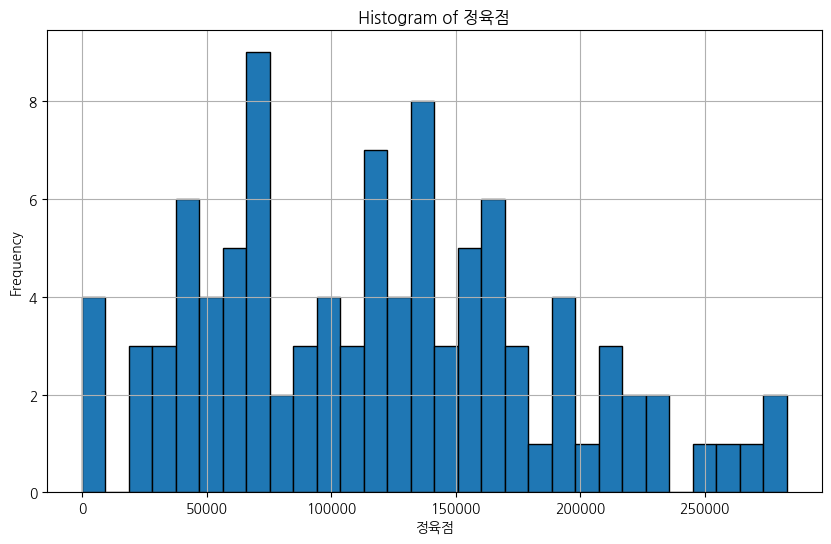

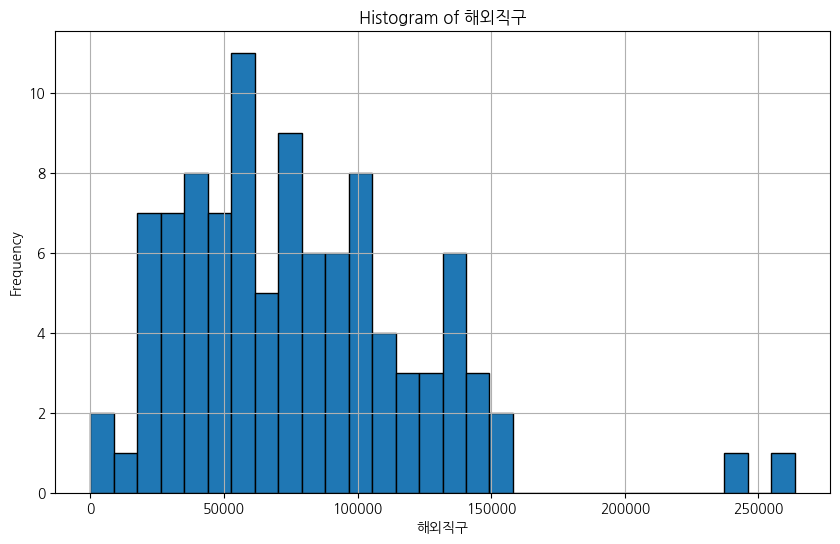

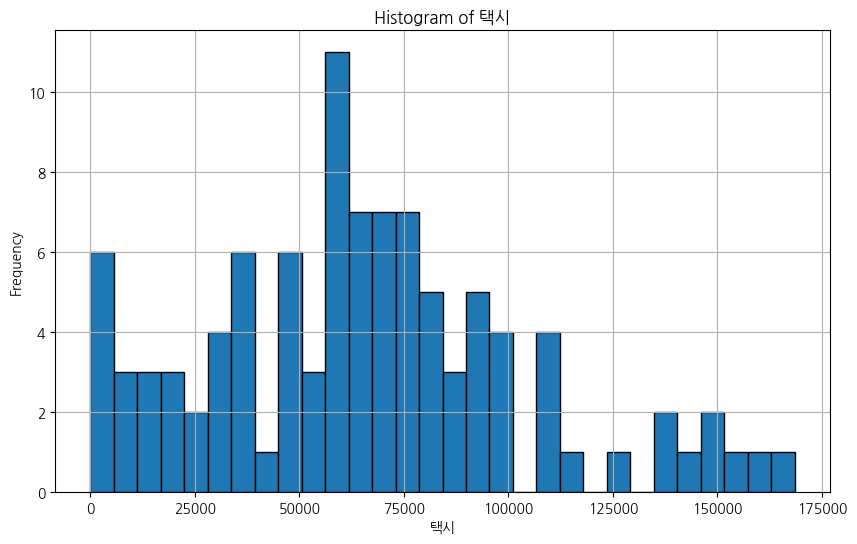

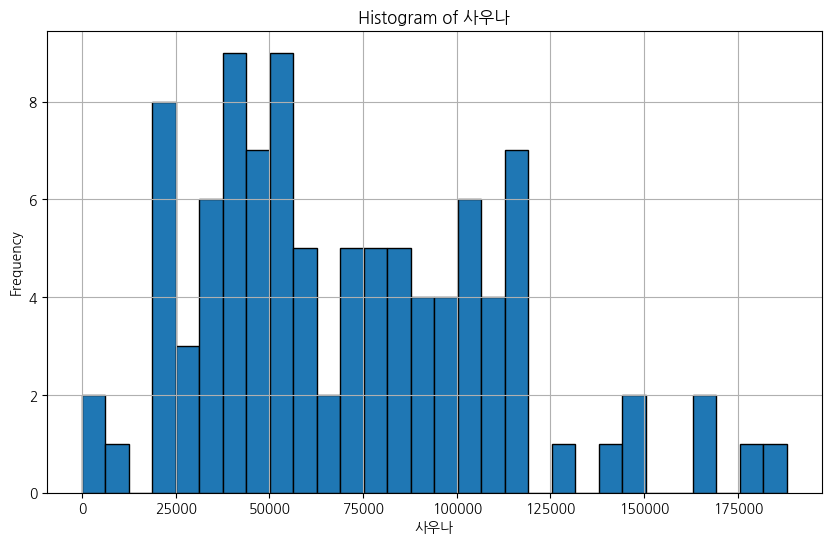

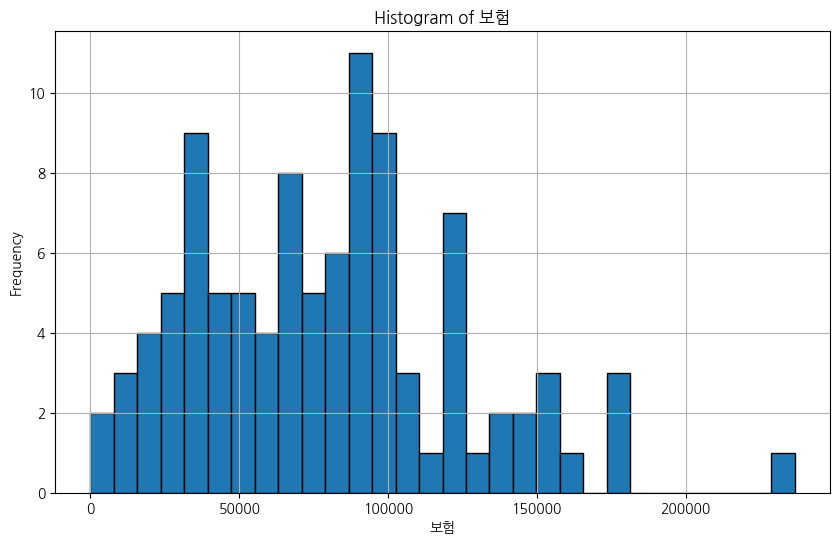

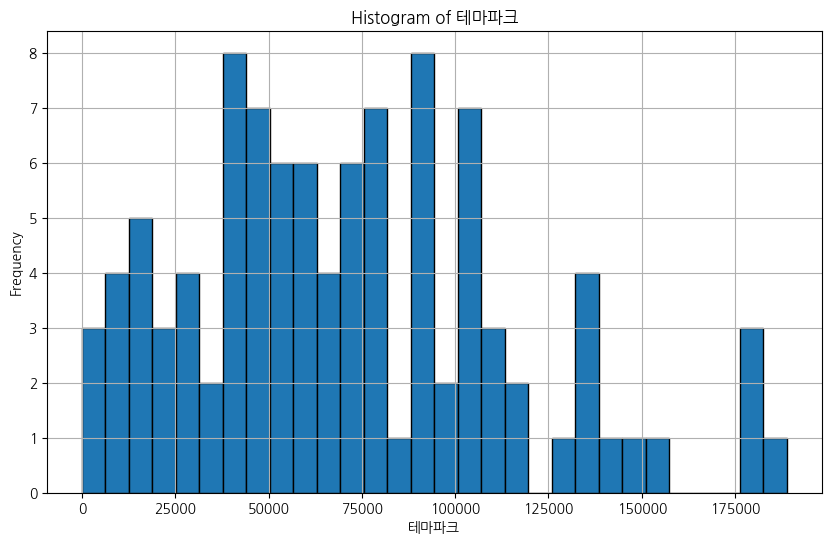

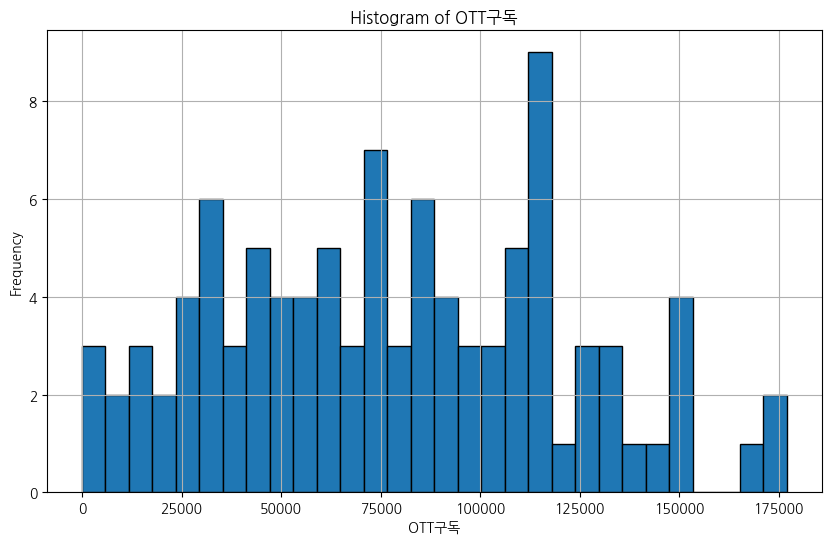

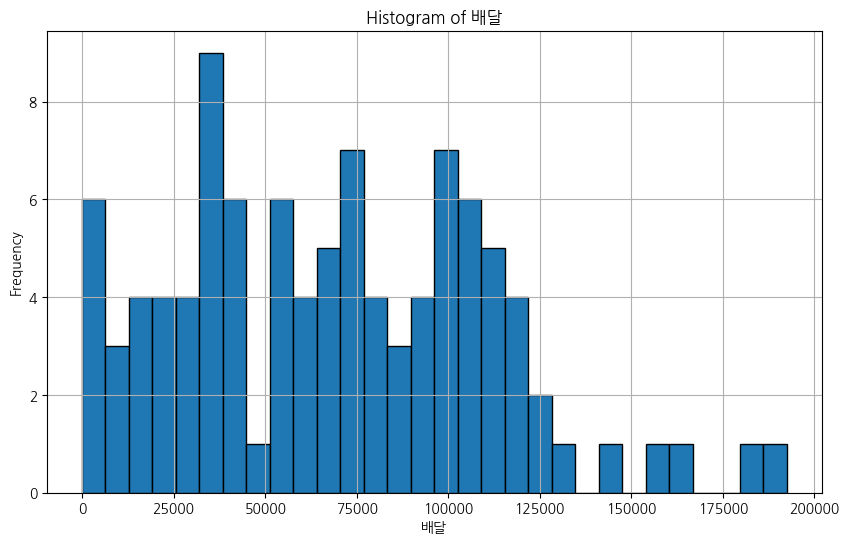

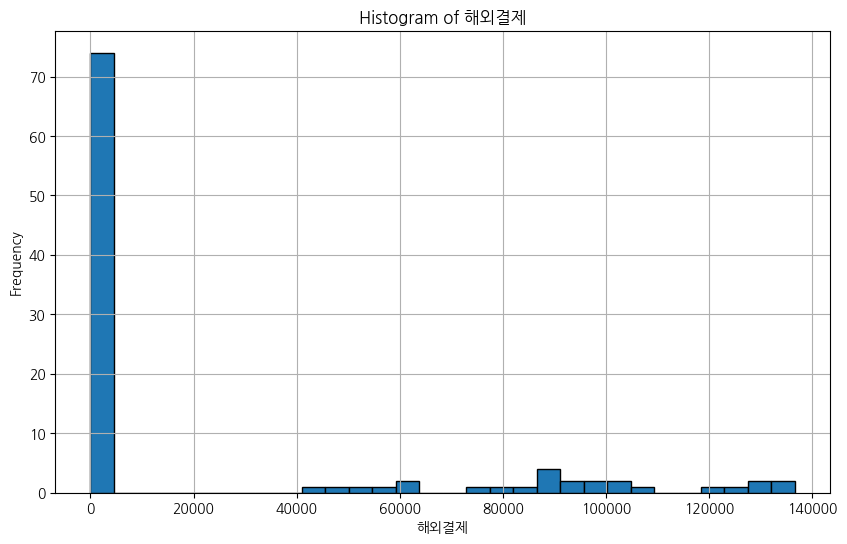

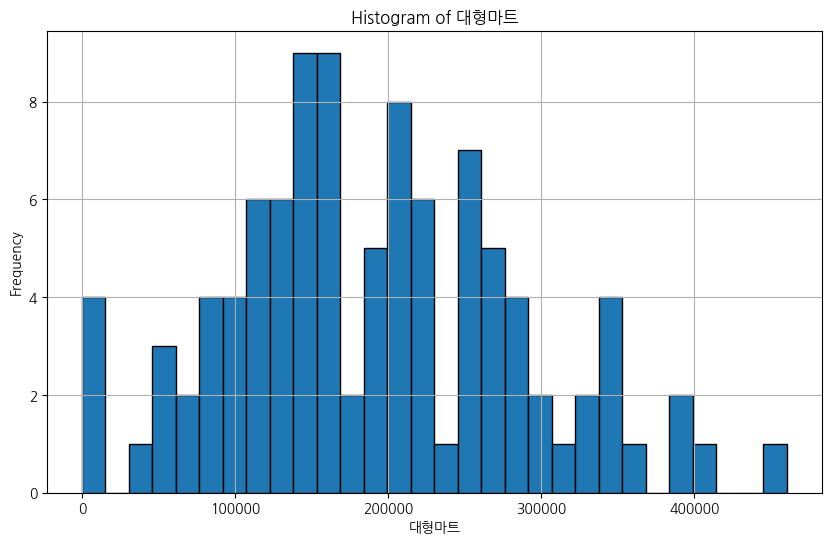

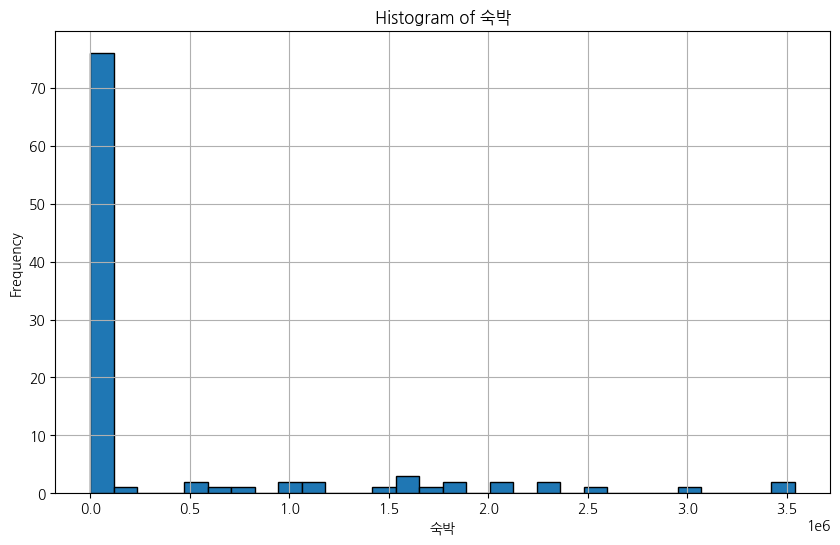

In [ ]:
import matplotlib.pyplot as plt

# 예시 데이터프레임 (df_sum이 결제 데이터를 포함한 데이터프레임이라고 가정)
# df_sum = pd.read_csv("payment_data.csv")

# 각 열에 대해 히스토그램 그리기
for column in df_sum2.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df_sum2[column], bins=30, edgecolor='k')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


In [ ]:
import scipy.stats as stats

# 각 열에 대해 Q-Q 플롯 그리기
for column in df_sum2.columns:
    plt.figure(figsize=(10, 6))
    stats.probplot(df_sum2[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')
    plt.grid(True)
    plt.show()


In [ ]:
from scipy.stats import shapiro

# 각 열에 대해 샤피로-윌크 검정 수행
for column in df_sum2.columns:
    stat, p_value = shapiro(df_sum2[column])
    print(f'Shapiro-Wilk Test for {column}: Statistics={stat}, p-value={p_value}')


In [ ]:
from scipy.stats import kstest

# 각 열에 대해 콜모고로프-스미르노프 검정 수행
for column in df_sum2.columns:
    stat, p_value = kstest(df_sum2[column], 'norm')
    print(f'Kolmogorov-Smirnov Test for {column}: Statistics={stat}, p-value={p_value}')


In [ ]:
from scipy.stats import anderson

# 각 열에 대해 앤더슨-달링 검정 수행
for column in df_sum2.columns:
    result = anderson(df_sum2[column], dist='norm')
    print(f'Anderson-Darling Test for {column}: Statistic={result.statistic}, Critical Values={result.critical_values}, Significance Levels={result.significance_level}')
